In [1]:
import pandas as pd
import os
import seaborn as sns
import matplotlib.pyplot as plt


In [2]:
os.getcwd()
#df = pd.read_csv("cleaned_train_tag.csv")

'c:\\Users\\justi\\Desktop\\Big Data Analytics\\Project\\Code'

In [3]:
os.chdir(r'C:\Users\justi\Desktop\Big Data Analytics\Project\Code')

In [4]:
df = pd.read_csv("cleaned_train_tag.csv")
df.head()

,Unnamed: 0,Gender,Age,Marital Status,Education,Years Worked,Commercial,Shareholder,Has App,Owns Car,...,Overdue Loans,Overdue Days,Has Credit Cards,Credit Use,Debit Cards,Credit Cards,Debit,Credit,Debit Card Level,Flag
0,0,M,23,Married,Doctorate,0,0,0,0,0,...,0,0,0,0,0,1,-1,325,0,0
1,1,M,26,Married,Doctorate,0,0,0,1,0,...,0,0,0,0,0,1,-1,1683,0,0
2,2,M,46,Married,Doctorate,0,0,0,0,0,...,0,0,0,0,0,1,-1,466,0,0
3,3,M,30,Married,Doctorate,1,0,0,0,1,...,0,0,1,2,0,3,-1,167,0,0
4,4,M,30,Married,Doctorate,0,0,0,0,0,...,0,0,0,0,0,2,-1,1,0,0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39923 entries, 0 to 39922
Data columns (total 32 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Unnamed: 0            39923 non-null  int64 
 1   Gender                39923 non-null  object
 2   Age                   39923 non-null  int64 
 3   Marital Status        39923 non-null  object
 4   Education             39923 non-null  object
 5   Years Worked          39923 non-null  object
 6   Commercial            39923 non-null  int64 
 7   Shareholder           39923 non-null  int64 
 8   Has App               39923 non-null  int64 
 9   Owns Car              39923 non-null  int64 
 10  Owns House            39923 non-null  int64 
 11  Wages Paid            39923 non-null  int64 
 12  Last Payment          39923 non-null  int64 
 13  Investment Risk       39923 non-null  int64 
 14  Total Asset Code      39923 non-null  int64 
 15  Potential Asset Code  39923 non-null

In [6]:
df['Gender'].value_counts()

M    23751
F    16172
Name: Gender, dtype: int64

In [7]:
df['Marital Status'].value_counts()

Married          19855
Never Married    18598
Separated         1035
Divorced           248
Widowed            187
Name: Marital Status, dtype: int64

In [8]:
df['Education'].value_counts()

Upper Secondary    21443
Bachelors           8759
Post-secondary      6759
Masters             2118
Doctorate            844
Name: Education, dtype: int64

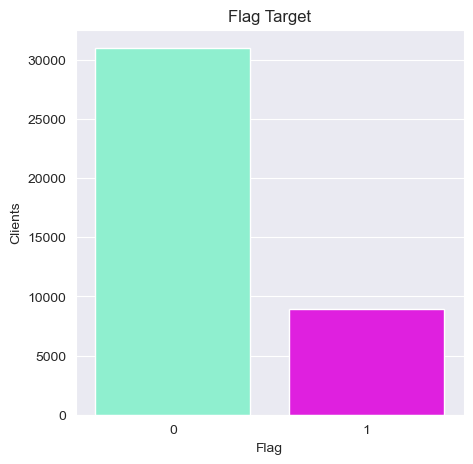

In [9]:
sns.set_style('darkgrid')
plt.figure(figsize = (5,5))
sns.countplot(data=df,x='Flag', palette= ['aquamarine','magenta'])
plt.title('Flag Target')
plt.ylabel('Clients')
plt.show()

In [10]:
df['Flag'].value_counts()

0    30970
1     8953
Name: Flag, dtype: int64

As we can see, the data is imbalanced which would need to be addressed.

In [11]:
flag_pred = df.drop(['Gender','Marital Status','Education','Years Worked','Unnamed: 0'],1)

C:\Users\justi\AppData\Local\Temp\ipykernel_17668\501203912.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  flag_pred = df.drop(['Gender','Marital Status','Education','Years Worked','Unnamed: 0'],1)


In [12]:
flag_pred.head()

,Age,Commercial,Shareholder,Has App,Owns Car,Owns House,Wages Paid,Last Payment,Investment Risk,Total Asset Code,...,Overdue Loans,Overdue Days,Has Credit Cards,Credit Use,Debit Cards,Credit Cards,Debit,Credit,Debit Card Level,Flag
0,23,0,0,0,0,0,0,-1,0,-1,...,0,0,0,0,0,1,-1,325,0,0
1,26,0,0,1,0,0,0,-1,0,-1,...,0,0,0,0,0,1,-1,1683,0,0
2,46,0,0,0,0,0,0,-1,0,-1,...,0,0,0,0,0,1,-1,466,0,0
3,30,0,0,0,1,0,0,-1,0,-1,...,0,0,1,2,0,3,-1,167,0,0
4,30,0,0,0,0,0,0,-1,0,-1,...,0,0,0,0,0,2,-1,1,0,0


In [13]:
flag_pred.dtypes

Age                     int64
Commercial              int64
Shareholder             int64
Has App                 int64
Owns Car                int64
Owns House              int64
Wages Paid              int64
Last Payment            int64
Investment Risk         int64
Total Asset Code        int64
Potential Asset Code    int64
Financial Producs       int64
Fund Purchases          int64
Insurance Purchases     int64
Gold Purchases          int64
Has Loan                int64
Total Loans             int64
Overdue Loans           int64
Overdue Days            int64
Has Credit Cards        int64
Credit Use              int64
Debit Cards             int64
Credit Cards            int64
Debit                   int64
Credit                  int64
Debit Card Level        int64
Flag                    int64
dtype: object

In [14]:
flag_pred.corr()

,Age,Commercial,Shareholder,Has App,Owns Car,Owns House,Wages Paid,Last Payment,Investment Risk,Total Asset Code,...,Overdue Loans,Overdue Days,Has Credit Cards,Credit Use,Debit Cards,Credit Cards,Debit,Credit,Debit Card Level,Flag
Age,1.000000,0.118040,0.195253,-0.001101,0.032764,0.069048,-0.021127,-0.003953,-0.017359,0.179891,...,0.008026,0.024264,-0.124489,-0.039808,0.103328,-0.066088,0.317575,0.269197,0.182773,-0.012285
Commercial,0.118040,1.000000,0.368345,0.092404,0.083508,0.175290,0.035089,0.083199,0.057383,0.165861,...,0.084184,0.052934,-0.003449,0.056303,0.219824,0.013386,0.189759,0.118620,0.239253,-0.008061
Shareholder,0.195253,0.368345,1.000000,0.103311,0.146590,0.076219,-0.024698,0.016532,-0.016973,0.138115,...,0.037814,0.048026,0.009522,0.126714,0.123646,0.007990,0.163333,0.156166,0.177313,0.066413
Has App,-0.001101,0.092404,0.103311,1.000000,0.144951,0.068207,0.262937,0.336939,0.402656,0.195612,...,0.028202,0.021251,0.084186,0.129372,0.209040,0.022323,0.224100,0.135481,0.470545,0.038830
Owns Car,0.032764,0.083508,0.146590,0.144951,1.000000,0.041439,0.067451,0.116239,0.042201,0.079290,...,0.018168,-0.000526,0.290423,0.456781,0.078146,0.084426,0.088230,0.175515,0.114665,0.055120
Owns House,0.069048,0.175290,0.076219,0.068207,0.041439,1.000000,0.037659,0.049248,0.043252,0.083403,...,0.016439,0.048808,-0.015048,0.005611,0.119345,0.000722,0.141402,0.093339,0.134887,-0.030705
Wages Paid,-0.021127,0.035089,-0.024698,0.262937,0.067451,0.037659,1.000000,0.514674,0.272485,0.121562,...,0.012838,-0.003746,-0.018424,-0.027860,0.123622,0.011077,0.157400,0.056087,0.285954,-0.060258
Last Payment,-0.003953,0.083199,0.016532,0.336939,0.116239,0.049248,0.514674,1.000000,0.153746,0.235415,...,0.027245,0.008550,-0.019579,0.010777,0.180884,0.013759,0.288281,0.132372,0.378134,-0.033471
Investment Risk,-0.017359,0.057383,-0.016973,0.402656,0.042201,0.043252,0.272485,0.153746,1.000000,0.053520,...,0.000026,-0.008019,0.031006,-0.013023,0.117133,0.010791,0.003636,-0.071030,0.346332,-0.021164
Total Asset Code,0.179891,0.165861,0.138115,0.195612,0.079290,0.083403,0.121562,0.235415,0.053520,1.000000,...,0.014451,0.022657,-0.031076,0.036298,0.160112,0.002695,0.370394,0.236470,0.374693,-0.019428


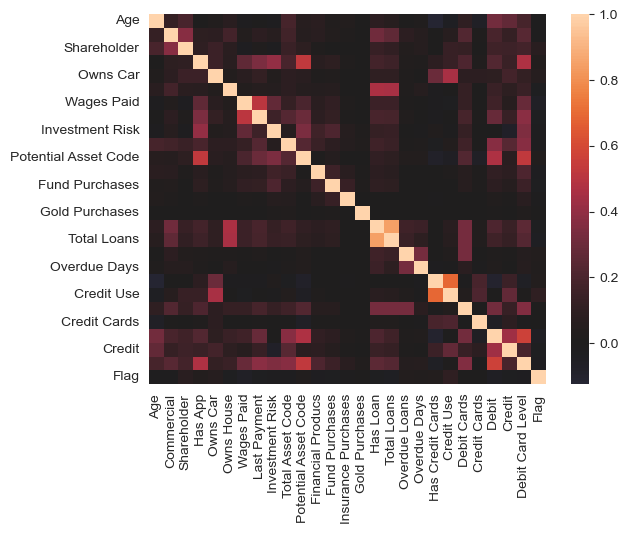

In [15]:
sns.heatmap(flag_pred.corr(), center=0);